In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
# load the iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
# create a pandas dataframe from the iris dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df = df.drop(columns='target')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
# normalize the features
norm = Normalizer()
norm_df = pd.DataFrame(norm.fit_transform(df), index=df.index, columns=df.columns)
norm_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


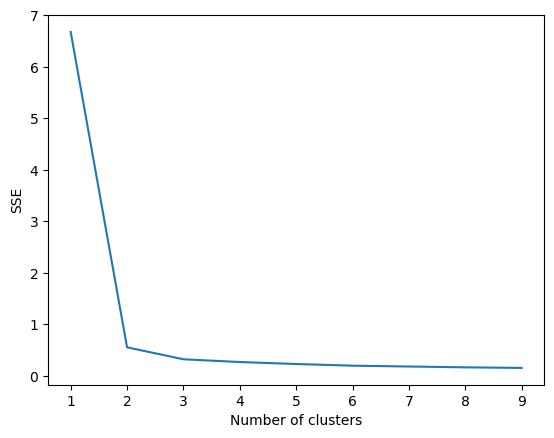

In [44]:
# perform KMeans clustering with different number of clusters and plot SSE vs number of clusters (Elbow plot)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(norm_df)
    sse[k] = kmeans.inertia_ 
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [45]:
# perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(norm_df)
kmeans

KMeans(max_iter=1000, n_clusters=3)

In [46]:
# get the cluster labels for each data point
labels = kmeans.predict(norm_df)
# add the cluster labels to the normalized features dataframe
norm_df['cluster'] = labels

In [47]:
cluster_means = norm_df.groupby('cluster').mean()

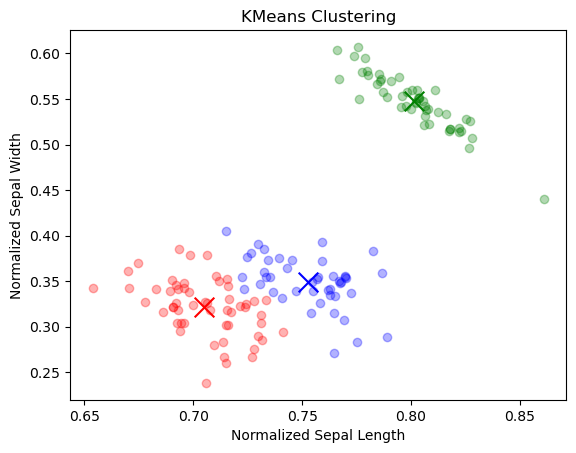

In [48]:
# create a scatter plot with different colors for each cluster and different markers for each centroid
fig, ax = plt.subplots()

for label, color in zip(range(3), ['red', 'green', 'blue']):
    ax.scatter(norm_df.loc[norm_df['cluster'] == label, 'sepal length (cm)'], 
               norm_df.loc[norm_df['cluster'] == label, 'sepal width (cm)'], 
               c=color, 
               alpha=0.3)
    
    ax.scatter(cluster_means.loc[label, 'sepal length (cm)'], 
               cluster_means.loc[label, 'sepal width (cm)'], 
               c=color, 
               marker='x',
               s=200)

# set the title and axis labels for the scatter plot
ax.set_title('KMeans Clustering')
ax.set_xlabel('Normalized Sepal Length')
ax.set_ylabel('Normalized Sepal Width')

# show the scatter plot
plt.show()

In [49]:
# print the summary
print("K-means Analysis Summary:")
print("----------------------------")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_}")

K-means Analysis Summary:
----------------------------
Number of clusters: 3
Cluster centers:
[[0.70495129 0.32178747 0.59235975 0.21499323]
 [0.80113979 0.5472692  0.23440877 0.03917808]
 [0.75290517 0.34920791 0.53149597 0.16393735]]
Inertia (within-cluster sum of squares): 0.3226817404832856
